In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('aac_shelter_outcomes.csv')
df.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown


### Convert "outcome_type" data

In [3]:
#"outcome_type" has multiple subcategories and therefore needs multiple dummy variables
df.groupby(["outcome_type"]).agg({'outcome_type':'count'})
#9 different categories in 1 dummy variable

,outcome_type
outcome_type,
Adoption,33112
Died,680
Disposal,307
Euthanasia,6080
Missing,46
Relocate,16
Return to Owner,14354
Rto-Adopt,150
Transfer,23499


In [4]:
#we only want to differentiate between adopted vs. not adopted
#so we have to categorize the 9 different types into 2 main categories
#1 == adopted, 0 == not adopted
df["outcome_dummy"] = df.outcome_type.map({'Adoption':1,'Rto-Adopt':1,
                                           'Died':0,'Disposal':0,
                                           'Euthanasia':0,'Missing':0,
                                           'Relocate':0,'Return to Owner':0,
                                           'Transfer':0})
df.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome,outcome_dummy
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male,0.0
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female,0.0
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male,1.0
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male,0.0
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown,0.0


### Check for missing values

In [5]:
#check for missing values in specific columns (all discrete values)
df.isnull().sum()

age_upon_outcome        8
animal_id               0
animal_type             0
breed                   0
color                   0
date_of_birth           0
datetime                0
monthyear               0
name                23886
outcome_subtype     42293
outcome_type           12
sex_upon_outcome        2
outcome_dummy          12
dtype: int64

### "age_upon_outcome" column

In [6]:
#check for missing values in "age_upon_outcome" column
df["age_upon_outcome"].isnull().sum()
#8 missing values
#after filling missing data = 0

8

In [7]:
#let's look at the count and determine most frequent since it is a discrete variable
df.groupby(["age_upon_outcome"]).agg({'age_upon_outcome':'count'})

,age_upon_outcome
age_upon_outcome,
0 years,95
1 day,153
1 month,3344
1 week,427
1 weeks,513
1 year,14355
10 months,1204
10 years,1159
11 months,490


In [8]:
#"1 year" occurs most frequently so fill in the missing data with this
df["age_upon_outcome"].fillna("1 year", inplace=True)

In [9]:
#double check data type
df["age_upon_outcome"].dtype

dtype('O')

### "name" column

In [10]:
#check for missing values in "name" column
df["name"].isnull().sum()
#23886 missing values
#after filling missing data with "missing" = 0

23886

In [11]:
#let's look at the count and determine most frequent
df.groupby(["name"]).agg({'name':'count'})

,name
name,
$Kittlez,1
*,2
* Bo Derek,1
* Daphne,1
* Henry,1
...,...
Zuzu,3
Zuzy,1
Zydeco,2


In [12]:
#note that there are too many names to determine which occurs most frequently so it is safe to assume that the missing values
#are missing for a meaningful reason (i.e., possibility that not every animal that came in had a name)

#we fix this by filling in missing data with the word "missing"
df["name"].fillna("missing", inplace=True)

In [13]:
#double check data type
df["name"].dtype

dtype('O')

### "outcome_subtype" column

In [14]:
#check for missing values in "outcome_subtype" column
df["outcome_subtype"].isnull().sum()
#42293 missing values
#after filling missing data = 0

42293

In [15]:
#let's look at the count and determine most frequent
df.groupby(["outcome_subtype"]).agg({'outcome_subtype':'count'})

,outcome_subtype
outcome_subtype,
Aggressive,506
At Vet,59
Barn,3
Behavior,142
Court/Investigation,18
Enroute,45
Foster,5558
In Foster,182
In Kennel,343


In [16]:
#"Partner" occurs most frequently so fill in the missing data with this
df["outcome_subtype"].fillna("Partner", inplace=True)

In [17]:
#double check data type
df["outcome_subtype"].dtype

dtype('O')

### "outcome_type" column

In [18]:
#check for missing values in "outcome_type" column
df["outcome_type"].isnull().sum()
#12 missing values
#after filling missing data = 0

12

In [19]:
#let's look at the count and determine most frequent
df.groupby(["outcome_type"]).agg({'outcome_type':'count'})

,outcome_type
outcome_type,
Adoption,33112
Died,680
Disposal,307
Euthanasia,6080
Missing,46
Relocate,16
Return to Owner,14354
Rto-Adopt,150
Transfer,23499


In [20]:
#"Adoption" occurs most frequently so fill in the missing data with this
df["outcome_type"].fillna("Adoption", inplace=True)

In [21]:
#double check data type
df["outcome_type"].dtype

dtype('O')

### "sex_upon_outcome" column

In [22]:
#check for missing values in "sex_upon_outcome" column
df["sex_upon_outcome"].isnull().sum()
#2 missing values
#after filling missing data = 0

2

In [23]:
#let's look at the count and determine most frequent
df.groupby(["sex_upon_outcome"]).agg({'sex_upon_outcome':'count'})

,sex_upon_outcome
sex_upon_outcome,
Intact Female,9143
Intact Male,9549
Neutered Male,27784
Spayed Female,25203
Unknown,6575


In [24]:
#"Neutered Male" occurs most frequently so fill in the missing data with this
df["sex_upon_outcome"].fillna("Neutered Male", inplace=True)

In [25]:
#double check data type
df["sex_upon_outcome"].dtype

dtype('O')

### "outcome_dummy" column

In [26]:
#check for missing values in "outcome_dummy" column
df["outcome_dummy"].isnull().sum()
#12 missing values
#after filling missing data = 0

12

In [27]:
#let's look at the count and determine most frequent
df.groupby(["outcome_dummy"]).agg({'outcome_dummy':'count'})

,outcome_dummy
outcome_dummy,
0.0,44982
1.0,33262


In [28]:
#"0" (not adopted) occurs most frequently so fill in the missing data with this
df["outcome_dummy"].fillna("0", inplace=True)

In [29]:
#double check data type
df["outcome_dummy"].dtype

dtype('O')

### Check for outliers
Since outliers are inherently specific to **continuous** data, it is safe to assume that outliers for **categorical** values do <u>*not*</u> exist. With that being said, what you consider an "outlier" is based on the context of the data and what you want to do with it.

For **example***, in the given set (A,B,C,X), it can be interpreted that X is an outlier since it does not follow the pattern of the alphabet with A,B, and C being the "main" values.

**example taken from categorical "outliers" reference*

In this assignment, I will check every column but will only deal with "outliers" that I believe significantly affect the respective **column*** based on its context.

**shortcut: only "name" column*

<AxesSubplot:>

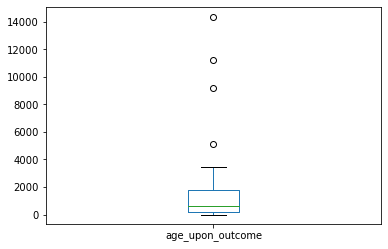

In [30]:
#examine "age_upon_outcome" boxplot
df["age_upon_outcome"].value_counts().plot(kind='box')
#outliers present but not significant enough to drop --> age varies

<AxesSubplot:>

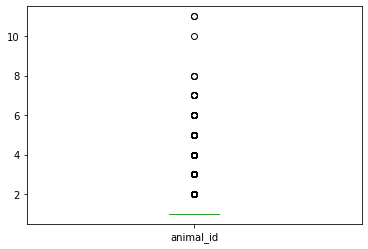

In [31]:
#examine "animal_id" boxplot
df["animal_id"].value_counts().plot(kind='box')
#outliers present but not significant enough to drop --> ID has no effect

<AxesSubplot:>

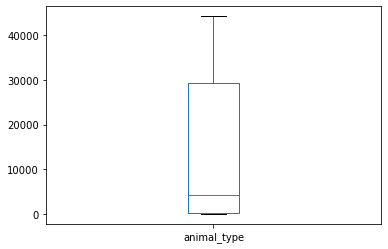

In [32]:
#examine "animal_type" boxplot
df["animal_type"].value_counts().plot(kind='box')
#no outliers

<AxesSubplot:>

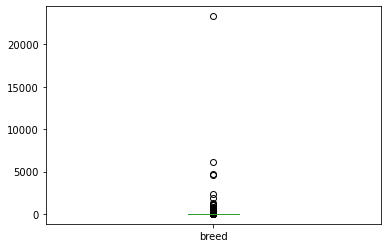

In [33]:
#examine "breed" boxplot
df["breed"].value_counts().plot(kind='box')
#outliers present but not significant enough to drop --> breeds vary

<AxesSubplot:>

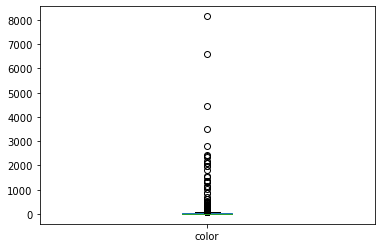

In [34]:
#examine "color" boxplot
df["color"].value_counts().plot(kind='box')
#outliers present but not significant enough to drop --> colors vary

<AxesSubplot:>

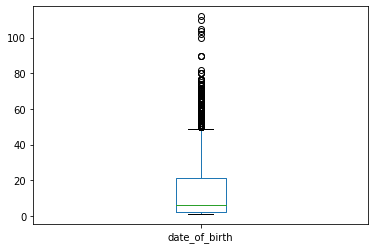

In [35]:
#examine "date_of_birth" boxplot
df["date_of_birth"].value_counts().plot(kind='box')
#outliers present but not significant enough to drop --> birth dates vary

<AxesSubplot:>

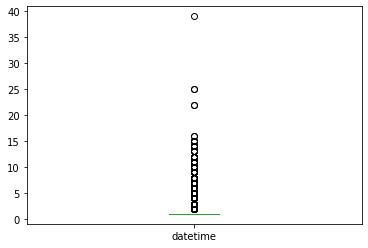

In [36]:
#examine "datetime" boxplot
df["datetime"].value_counts().plot(kind='box')
#outliers present but not significant enough to drop --> dates and times vary

<AxesSubplot:>

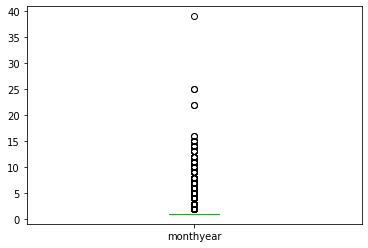

In [37]:
#examine "monthyear" boxplot
df["monthyear"].value_counts().plot(kind='box')
#outliers present but not significant enough to drop --> months and years vary

<AxesSubplot:>

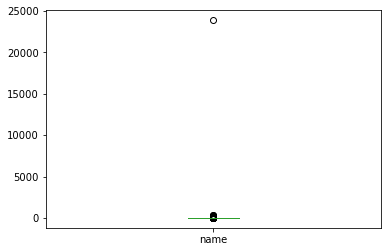

In [38]:
#examine "name" boxplot
df["name"].value_counts().plot(kind='box')
#outliers present and significant enough to drop --> some names have asterisks

In [39]:
#we can see that there are astericks in front of some names that need to be removed
df["name"].sum()

'missingLucy*JohnnyMondaymissing*Edgarmissing*EllaLucy*FridaStella LunaFancyKashSandyShy*Truman*Newtmissing*BonnieElsamissingChesterDolly*Oliver*PrestonOlivemissingPromiseMinnie*BumblemissingmissingmissingmissingShadesmissing*PennyGingerPumpkin*JoshmissingWinnieAriaSnowflakeSmokeOreo*DoraDelilahLexmissingmissing*Cosmo*BrodyIttybittyLuckyCocomissingCalTinker BellMaggiemissingmissingHoney*BoudreauxSam*MaddieTobimissingmissingmissing*Sophiemissing*BambimissingMischiefmissingmissingmissingmissingmissingmissing*RosemissingmissingDutchessRingomissing*Reese*MonkeymissingLouieBevomissingmissingChicomissingmissing*Flicker*HermanLucyChuckBooger*MikeChubsmissing*Magnolia*Winston*Kim*GeorgeSonny*Alleymissing*MartinDeloresGuziVincemissingmissingRubyChuminomissingmissingBusterTiki*Taylormissing*Raleigh*AmbermissingmissingJennymissingmissingRockstar*LibbyRainyTrixiRocko*DrakemissingDeucemissingLunaZeusmissingmissingHarleymissing*Nikkomissing*Pearlmissing*Jude*TrinitymissingmissingmissingSimbamissingB

In [40]:
#we can fix this by replacing the asterisks with an empty string
df["name"] = df["name"].str.strip().str.replace("*",'')

#let's check our work again
for val in df["name"]:
    if not str(val).isdigit():
        print (val)

missing
Lucy
Johnny
Monday
missing
Edgar
missing
Ella
Lucy
Frida
Stella Luna
Fancy
Kash
Sandy
Shy
Truman
Newt
missing
Bonnie
Elsa
missing
Chester
Dolly
Oliver
Preston
Olive
missing
Promise
Minnie
Bumble
missing
missing
missing
missing
Shades
missing
Penny
Ginger
Pumpkin
Josh
missing
Winnie
Aria
Snowflake
Smoke
Oreo
Dora
Delilah
Lex
missing
missing
Cosmo
Brody
Ittybitty
Lucky
Coco
missing
Cal
Tinker Bell
Maggie
missing
missing
Honey
Boudreaux
Sam
Maddie
Tobi
missing
missing
missing
Sophie
missing
Bambi
missing
Mischief
missing
missing
missing
missing
missing
missing
Rose
missing
missing
Dutchess
Ringo
missing
Reese
Monkey
missing
Louie
Bevo
missing
missing
Chico
missing
missing
Flicker
Herman
Lucy
Chuck
Booger
Mike
Chubs
missing
Magnolia
Winston
Kim
George
Sonny
Alley
missing
Martin
Delores
Guzi
Vince
missing
missing
Ruby
Chumino
missing
missing
Buster
Tiki
Taylor
missing
Raleigh
Amber
missing
missing
Jenny
missing
missing
Rockstar
Libby
Rainy
Trixi
Rocko
Drake
missing
Deuce
missing
Lun

Daisy
missing
Sparky Rex
Lola
Percy
missing
Walter
missing
Frijolito
X
Cooper
missing
Rajun
missing
Pascal
Mason
Ryleigh
Tiny
Adele
Major
Bella
Lobo
Gidget
missing
Nene
Bear
missing
Riggs
Colonel
Baxter
Maury
Koda
missing
missing
Rusty
Katy
Jasmine
Pinky
missing
Stitch
missing
Midnight
Jasper
missing
Ra Ra
Paris
Skye
Huffy
Yoda
missing
Tigger
Colt
Jammer
Wednesday
missing
Taylor
missing
missing
Yoakum
missing
Duffy
missing
Louie
Queens
Forest
missing
Nala
missing
Pepper
missing
missing
Grace
missing
missing
Diamond
missing
Winnie
Posey
Snow
Yellow
Daisy
Doogle
Cognac
Ria
missing
missing
Travis
missing
Shabba
Star
Sadie
Navaho
Taco
Rio
Jack
missing
Millard
Sandy Boy
Matilda
missing
Rusty
Max
Suki
missing
Bandit
missing
Walter
Vivica
Gabby
Nickel
missing
missing
missing
missing
Steven
Paddy
Bonita Bubbl
Davidson
missing
Pepper
Socks
Adelaide
Miley
missing
missing
missing
Bandit
missing
Rocky
missing
missing
missing
Lucas
Little Bit
Tigger
Milburn
Doc
Cracker
missing
Tripp
Rosie
missing
m

Sampson
missing
Sara
Rex
Kasey
Charlie
Rusty
Chester
Snickers
Orangina
Ranger
Shady
Luna
Perla
Freesia
Mya
Milo
Daphne
Pete
Olive
Bambi
missing
Gil
Emily
missing
missing
Camo
Harley
Ringo
Cooper
Lucy
missing
Coco
missing
missing
Izzy
Krypto
missing
Sam
Iris
missing
Spencer
Sandy
Herby
Pete
Thor
Lisa
missing
missing
missing
Buddy
Lucy
Trey
Rocky
Oso
missing
Goofy
Shade
missing
Shadow
missing
missing
missing
Ivy
Grant
Lacey
Emily
missing
Cody
Louie
missing
missing
Muneco
Drake
Bobby
Norton
Blue
missing
missing
Bella
Willow
Assassin
missing
missing
Mason
Haven
missing
Arctic
Zipper
Skye
missing
missing
Jerry Lee
Trudy
Diamond
Ben
Zena
Gisselle
Pepper
missing
missing
Oscar
Dez Peanut
Eevee
Oreo
missing
Oreo
Maximus
Nicole
Buddy
missing
Jasper
Amelia
Boo
Wilson
Frieda
Stuff
Tarva
Pippa
missing
missing
Betty
Olive
Blue
Remmy
Daisy
Jewel
Princess
Momo
missing
Xica
missing
Chaplin
Radar
Darby
missing
Raven
Diamond
Alf
Jackie
Kookie
Max
Bunny
Heidi
Loki
Jack
missing
missing
Bobbie
Cosmo
Nina
Ma

Dahmer
Vespa
Gus
Sleepy
missing
missing
June
Jane
Mei Mei
Mojo
Wallace
Toby
missing
missing
Ace
Buddy
Belle
missing
Achilles
Addie
missing
Bella
missing
Zoey
missing
missing
Pocas
Oliver
Watson
Buster
Rodney
missing
missing
missing
Sven
missing
Jasper
missing
Brooster
Allie
Marble
Jagger
Rascal
Elwood
Max
Diamond
Lola
Eeyore
Belle
Mia
Tiddle Bug
Honey
missing
Hopper
missing
Thor
Willy
missing
missing
Heater
Andy
Hannah
missing
Anatoly
Archie
missing
missing
Marilyn
missing
Millie
Parker
missing
Max
Rudolph
Rupert
Mickey
Carter
missing
Cooper
Huckelberry
Meechum
Bella
missing
missing
Justin
missing
Cowboy
Duchess
Tater Tot
Calka
Bailey
Mia
missing
Anna
Muneca
Lily
Bonnie
missing
Mitch
Sofia
Frodo
missing
Bella
missing
Frisco
Bruce
Duke
Princess
missing
Mabel
Bill
missing
Sheeba
Lola
missing
Pancho
Bella
Bella
Bueller
Gable
Tallulah
missing
Chico
missing
Presley
Benny
missing
Bunny
Svi
missing
Darby
Dino
Midnight
Jersey
Patches
missing
missing
Dolly
Jambalaya
Pecos
Gracie
Allie
Frank
mis

missing
missing
Sachi
Rumble
Scruffie
Shadows
Finn
missing
Freda
missing
missing
missing
Koko
Mo
missing
Yogi
Sebastian
Marina
missing
Dessau
Carmella
Jake
Cookie
July
missing
missing
Ella
Abby
Cinna
Storm
Dixie
Porter
missing
Mr. Potato
Diamond
missing
Paige
missing
Princess
Valent
Squeaky
missing
Lionel
Rose
Ricky
Braveheart
Abby
missing
Louie
Ping
missing
missing
missing
Bear
Fe
missing
Shadow
missing
Mayhem
missing
missing
missing
Moe
Pichin
Harlan
Boing
Kali
Crystal
Freeda
missing
Luca
Cindy
missing
missing
Hunter
Rawhide
missing
Cotton Elle
Caesar
Hambone
missing
Pam
Cookie
Penny
Reese
Lady
missing
Freckles
missing
Bubbles
Buddy
Maizy
Ruby
Sammy
Noodles
missing
Mercedes
missing
Stormy 3
Birdie
Heidi
Casanova
Chalky
Lana
missing
Rocky
Roxie
Jingle
Boris
Felix
Jd
Boone
Milton
Duke
Jirah
Mischief
missing
missing
missing
X
missing
Cato
Halo
missing
Alfie
Lala
Miloe
missing
missing
missing
Bonez
Scarlet
missing
missing
Spot
Joey
missing
missing
Hannah
Autumn
Rommel
missing
Nessie
Beat

missing
missing
Eloise
Lila
missing
missing
Maple
missing
missing
missing
Chiquita
Aspen
Abby
Gabby
Star
Graves
Yayo
missing
Sharpie
Corazon
Enrico Furmi
Frankie
Gordo
missing
Minnie
missing
Mario
Manda
Remy
Jello
Clover
Tabbie
Juni
missing
Brutus
missing
Rory
Spike
Elvis
Milo
missing
Princess
Waffles
Harry
Zoey
Wicked
missing
Ella
Victoria
missing
missing
Dede
Seamus
Chico
X
Zoe
missing
missing
Gwen
Beans
missing
missing
Navin
Molly
Periwinkle
missing
missing
Bear
missing
missing
Parry
Roxy
Marley
Koopa
Twyla
Precious
Keah
Hansel
missing
missing
Clint
missing
Grizz
Colbie
Nikki
missing
Violet
Belle
missing
Tuna
missing
missing
Bear
missing
Jax
Chris
missing
Sandy
Rosco
Winston
Marmalade
Delta
Duke
Zilkie
missing
missing
missing
Daphne
Grandy
missing
 Henry
Simon
Ridley
Juju
Savini
Schotzy
Molly
Marlee
Skama
missing
missing
Ladybug
missing
missing
Doc
Angel
Cole
Lil Bit
Princess
missing
missing
missing
Asparagus
Dottie
Tulley
missing
Man
Diamond
Lex
missing
Bo
Libby
Pickle
Pokey
missin

Coco
Severus
Shadow
missing
Onyx
Leela
Kila
missing
missing
Mabel
Tyson
Jade
missing
missing
Copper
Petey
Benjamin
Gunner
missing
Willow
Reilly
Gillian
Lil Girl
missing
Double
Lola
missing
Walterwhite
Mozart
Chiquita
Huck
Shiner
missing
Gatsby
missing
missing
Jules
missing
Julep
missing
Ninja
Weezy
Killer
Blue
Katie
missing
Hoppin' Jon
Oliver
Bailey
Big Otis
missing
missing
Bonnie
missing
Daisy
Ottis
missing
Cookie
Lacy
Luna
Rex
missing
Marshmallow
missing
missing
Bingo
missing
Bobby
Lucy
Max
Larry
missing
missing
Jorge
Yoshi
Gabby
missing
Sally
Lucy
missing
Mia
Hannah
missing
Max
missing
Shamrock
Rocky
Sadie
Lulu
missing
missing
Max
Chloe
Martin
Sheldon
Spice
missing
missing
missing
missing
Bud
Roxie
missing
Khaleesi
missing
Olive
Eli
Flynn
Buddah
Chiquita
Sprite
Chevy
missing
Sophie
Luna
missing
Holly
missing
missing
Lily
missing
missing
Makarov
missing
missing
missing
Pya
Wilson
Macon
Colton
missing
missing
Wrigley
missing
George
Chestnut
missing
missing
Rex
Emma
Kingsley
Blue
missi

Tigra
Buster
Filina
missing
Vince
Flutterby
missing
missing
Beau
missing
Arenal
Rocky
Puffer Cat
Twyla
missing
Boomer
Jack
Sheeba
Molly
missing
Dos
Duke
Charlie
Oreo
Cuddles
missing
Tiger
Roscoe
missing
Nala
Brandy
Andie
missing
Perla
Minnie
Cece
Stacie
Bruno
Yoshi
Gatsby
missing
Stella
Nancy
Chico
missing
missing
Lana
Athena
Hudson
Lourdez
Daise
Booch
Trinity
Trunks
Sam
Pink
missing
missing
missing
Kane
Fenrir
missing
Keen
Bella
Uno
missing
Gidget
Thomas
Maudie
missing
missing
Sherlock
Leo
Finn
Parker
Emmie
Red
Mercedes
missing
Knight
Oso
missing
missing
missing
missing
missing
Sally
Momo
Tolouse
missing
missing
missing
Frisco
Johnny
Lily
Shiloh
Zeba
Luna
missing
Toby
Sophie
missing
Ginger
Thor
missing
missing
missing
Dylan
missing
Goofy
missing
missing
missing
Sally
missing
Teddy
Miss Mandy
Dora
Sophie
Sweety Pie
Linux
Rosie
Jeff
Tula
Pinto
Kat
Marla
missing
Max
missing
missing
Zoey
Maude
Renee
Diva
missing
missing
missing
Otto
Pupper
Queso
Puma
Cass
missing
Bella
Becky
Pequena
Herk


missing
missing
missing
Frito
missing
Sparky
Sophia
missing
Luna
Gordon
Hayden
missing
missing
Elvin
Christmas
missing
Teddy
Brownie
Moby
missing
missing
missing
Brisket
Twinkie
Ariel
missing
Sophie
missing
Stevie
Owen
missing
Bratt
missing
Laika
missing
Cash
Milo
Markie
Penny
missing
Bambino
X
Mr. Pip
Amber
Layla
missing
Moe
Jack
missing
Nike
missing
missing
missing
missing
missing
missing
Hudson Hawk
Honey
Max
Chato
missing
Crystal
Angel
Marvin Gaye
Bell
missing
Miller
Skyler
Poopy
Missy
Ginger
Champ
missing
missing
Peggy
Mocha
Lydia
Tyson
Clementine
missing
missing
Carolina
Chance
Caramel
missing
Izzy
missing
missing
missing
missing
Pinta
Lulu
Santa Girl
missing
Tara
Toby
Max
Andy
Polly
missing
missing
missing
Ace
Gracie
missing
Finn
Gracie
Brewster
Dug
missing
Dorothy
missing
Manny
Tulip
Franklin
Rex
Milo
Olaf
Zoey
Cinnamon
Dallas
Dixie
missing
Mickey
Darla
Romeo
Wilbur
missing
missing
Trixie
missing
Ginger
Kate
Alex
Ashley
missing
missing
Tica
Angela
Chubbs
Terra
missing
Luke
Dant

missing
Casper
Ares
Diamond
D-Wayne
Riley
missing
missing
Sofia
Mcneal
Boots
missing
Kekipi
Toto
missing
missing
missing
Spaghetti
Lashonda
Scoobie
Sadie
missing
Guthor
Pepper
Pumpkin
missing
Lillian
Buki
Sheba
missing
Leroy
missing
missing
missing
missing
missing
Blackie
Ringo
Cooper
Cassie
missing
Mona
missing
Betty
Cookie
missing
missing
Frisky
Annie
Aurora
missing
Winston
Chaos
missing
missing
missing
Mishka
Rocky
Edward
Blaze
missing
Petey
missing
missing
missing
Alex
Rex
Hailey
missing
Fletcher
missing
missing
missing
Sunshine
Otis
missing
missing
Milo
missing
missing
Sylvia
Aster
Roy
Alfred
Angel
missing
Kanga
Jasmine
missing
missing
Rocky
missing
Pinochle
Monte
Lucky
Gyula
missing
Powder
Money
T-Che
missing
Taz
Kayla
Sophia Loren
Harvey
Whiskey
Fritz
Belle
Moon
Garfield
Chloe
Milt Jackson
Zoey
missing
Big Boy
Luna
Kimby
missing
missing
Banjo
Trouble
Helen
missing
missing
Gabby
Phoebe
missing
Jamie
missing
So
Bella
Bee
missing
Trini
Mona
Clint
Frannie
X
missing
missing
Brownie
m

missing
Gucci
Denali
Meggy
missing
missing
missing
Pickle
Princess
Chico
Kramer
Seth
Romeo
Sugar
Carrie
missing
Mikey
Damon
Jasper
missing
Molly
Loco
Amélie
Kitten
Pepper
Coco
missing
Teddy Graham
missing
Sadie
Edward
Casanova
Callie
Nitro
missing
Moose
Wiz
Lola
Diesel
Olive
Freddy
missing
Rally
Brooke
missing
missing
Domino
missing
Prince
Caliman
Royce
missing
Balsamic
Junebug
missing
Possum
Vader
Shimmer
Kozee
Tigre
Max
Butter
missing
Otto
Harlow
Hank
Marvin
missing
Sparkly
Davinci
Punkin
missing
Momo
missing
Bashful
Roxanne
Max
Quincy
missing
missing
Midnight
Lemming
missing
Garfunkel
Judo
Europa
Kitty
Homer
missing
missing
Luigi
missing
missing
Poppy
Lobo
Scout
missing
Kluts
missing
Thor
Charlie
Hera
Silver
Tara
Queenie
Charlie
Reggie
Little Bug
missing
Kai Franco
missing
missing
Robbin
Gus
missing
missing
Hercules
Zippy
Rose
missing
Daisy
missing
missing
missing
Cloud
missing
missing
missing
Rita
Lissa
missing
missing
Sam
Dodger
missing
missing
Junebug
Sir
missing
Cate
missing
Man

Ice
missing
Joe
missing
Jackson
missing
Birdie
Trip
Talini
Tito
Nigel
missing
Cloe
Wesley
missing
Thunder
Valentine
Pulguso
Lea
missing
missing
Olivia
Luigi
Charlie
Hanna Jo
missing
missing
Geronimo
missing
missing
missing
missing
Nina
Capone
missing
Helena
Oso
missing
Pete
Tigris
missing
Dandy
Rooster
Giblet
missing
Darla
missing
missing
Gale
Ruby
K.J.
missing
missing
Chico
missing
Gracie
Jd
missing
missing
Opie
Sue
Star
Delta
missing
Rosie
missing
Sid
Smokey
Cotton
missing
Heartbreaker
Fire
Chato
missing
Bear
missing
Little Foot
Emma
missing
missing
Roberto
Tesla
Ladybug
missing
Marty
Ernie
Pepper
Chiquito
Dash
Crixus
Roxie
missing
Gidget
Lady
Mambo
Annie
Chuck
missing
Webster
Lucy
Aspen
missing
missing
Diesel
Toney
Ping
Lizzie
Brodie
Zooley
missing
Evie
missing
missing
Rosco
missing
Starla
Kozi
Ramona
Lauralei
Santino
missing
missing
Mona
Gracie
missing
Juju
Billy
missing
Pichu
Hazel
missing
Daisy
Sadie
Rosie
Salty
Izzy
missing
Zoey
Gloria
missing
missing
Toby
Casanova
missing
Smore

Morocco
Willow
missing
Gus
Roco
Boko
Geno
missing
Wiley
missing
missing
Louden
Doc
missing
Hank
Simon
Dolly
missing
Duke
Miramar
Penelope
Rocky
missing
missing
Sweetie
Rocky
Moby
missing
Zazu
Jake
Abby
Minnie Mouse
Casey
missing
missing
Roxie
Miss Cleo
Penny
Chancellor
Giovanni
Lucy
missing
missing
Jordan
Sugars
King
missing
Harvey
Sonny
Marley
Penny
missing
missing
Grenes
Bonnie
Toby
C
Snickrdoodle
Ralphie
Fossa
Tony
Shyla
missing
Darling
missing
missing
Bambi
Barnaby
Ruby Rose
Ryder
Diesel
missing
Skye
missing
Big Red
missing
missing
Hickup
Tony
missing
missing
Bruce
missing
missing
Hanna
missing
Max
missing
Pickles
Bella
Brindle
Potato
Lencho
Tedi
Licorice
Dee Dee
Edith
missing
Scout
Piper
Sia
Brownie
missing
Mya
Calla
Exalibur
Thunder
Reno
Catniss
missing
missing
missing
Hector
missing
Leash
missing
Rhino
Niles
missing
Frankie
missing
Piper
Shelby
Petey
Tre
Duke
Annie
missing
Oscar
Morgan
missing
Bronwyn
Percy
missing
Indigo
missing
Biscuit
Diamond
Harley
missing
Valentine
missing


missing
Phoebe
Tobey
missing
Babe
Bubba
missing
Bramble Pelt
Benji
missing
Trinity
Gracie
Simon
Rex
Allie
Lady
Pearl
Boss
Leyna
Bella
missing
missing
Ginger
Roscoe
Fay
missing
Duke
Teddy
Amy
Ava
Sputnik
missing
missing
Trula
missing
Dirty
missing
Tess
missing
Paisley
Dobby
Dingo
missing
Lily Pad
Ramona
missing
Pricilla Sue
Hopscotch
Austin
Momo
Robbie
Agnes
Fiona
Gunner
Rosie
missing
Goldie
Martini
Jersey
Foxie
Papi
Sweetie
Polly
Angus
missing
Bentley
missing
Bolt
missing
Yuki
missing
missing
Pickle
missing
Dustin
missing
Snoopy
Bruce
Rubble
Peter
Roswell
Chica
missing
Tinker
Rascal
missing
missing
missing
Chico
Kyla
Gracie
Chase
Roxy
Annabelle
Cinnimon
missing
Groot
Lemon Drop
missing
Biscuit
Remi
missing
missing
missing
Camelia
Midnight
Leia
Mew
Stella
Kootrie
Jade
missing
Lover
missing
Rocky
Rinne
Weenie
Franz
Maggie
Loki
Millie
David
Sadie
Pita
missing
Guero
Luke
missing
Jewel
Mike
Prada
Penelope
missing
Max
Molly
Dolly
Benny
Tiki
Compadre
missing
missing
Snoop Dog
Missy
missing
To

missing
Pepper
Poppy
Daisy
Lydia
missing
Scout
missing
Baby
Chris
missing
Chubs
Mozart
Trent
Harley
Sunshine
Leia
Shop Cat
Adolf
missing
Willow
Maverick
Locket
Chewy
Daytona
Cash
missing
Abby
Andy
Bruno
Blondie
missing
Daffy
Domenico
Dustin
missing
Little Foot
Alvin
Mitzi
Ebony
missing
Baxter
Lavender
Snowball
missing
Lucie
missing
Max
missing
missing
Kharson
Smores
Paige
Papi
missing
Anders
Apollo
Ember
Charlie
Alphones
Jefferson
O'Malley
Aspen
Amber
Talisa
Jaxon
Jasmine
missing
River
Sandy
Campbell
Alyssa
Blue
Snuflupagus
Nina
Susie
Nora
Tilly
missing
missing
Tabitha
Paula
Toota
missing
Tiny
Puma
Selina
Butterscotch
Pockets
missing
missing
Snow
Ty K.
Sage
Berry
missing
missing
Naomi
Polly
missing
Rossco
Gloria
Angelika
missing
Zune
Aj
Duncan
missing
Mack
Tiny
missing
Zoe
Morgan
Major
Moe
missing
Remee
missing
Samba
missing
missing
Marmaduke
Chia
Frida
missing
Toshio
Charlie
Hachi
Chico
missing
Darry
Cleveland
Buddy
Basil
Daisy
missing
Damian
missing
Heidi
missing
Shawna
Sarah
missing

Cooper
Slicer
Kurt
missing
missing
Scooby
Daisy
Gelato
missing
Edgar
Victoria
Cupcake
Dixie
Bess
Deebo
Hope
Hardball
Snap
Olive
missing
Tinker
missing
Roxy
missing
Sparkle
Meringue
missing
Jett
missing
missing
missing
missing
Tikaani
missing
Boris
Coco
Sadie
missing
Sneezy
missing
missing
Candy Corn
Leo
missing
missing
Blancanieves
Quince
Peaches
Fred
Latte
Lunalovegood
Toby
missing
Champ
Bianca
Lookie
Puppy 1
Georgo
missing
missing
Princess
Bella
Sparrow
missing
Jackson
Chappie
Charlie
Fiona
missing
Baby
Josie
Cooper
Allie
Numi
Kade
Casey
Sandstone
Karlie Jo
Lucy
Pooka
Jj
missing
missing
Kida
Tessie
Bow
Neela
Papa Chino
Coco
missing
Duncan
missing
Rayven
Pepper
Pork Chop
Seamus
Elsa
missing
Mitchell
Kitty
Buddy
Skippyjohn
Casey
Tawney
Oliver
missing
Bukana
Ollie
Bull
missing
Aveta
Auri
Honey
Sewanee
Iris
Lambau
missing
Gretel
Mommy
Peaches
Karmen
Snoopy
Nathanadria
Monroe
Brownie
Walter
missing
missing
missing
missing
Jackie
missing
missing
Austen
missing
Prudie
Rilla
Soldier
Samson
A

missing
Beauty
missing
Zeeks
Oreo
Ducky
missing
Kona
missing
Skeeter
Bobby
Tobby
Titan
Kilo
Duke
missing
Barry
Benton
Leo
missing
missing
Irie
Kismet
Kaya
Sam
missing
missing
Cricket
missing
Boss
Buddy
Eros
Carolina
missing
Franklin
Freddie Brew
missing
missing
missing
Vito
missing
Polly
missing
Chloe
Libby
Goblin
Maria
Hunter
Polly
Dallas
Buck
Chloe
missing
Roxy
Max
Fennel
Savage
Maximus
missing
Pooh
missing
Toby
Zelda
Cooper
Snow Cone
Emma
Raven
Lanna
Lakota
missing
Ghost
Bella
missing
missing
missing
missing
Monroe
Blueboy
Tate
Luna
Mr. T
Ranger
Venelope
missing
Acorn
Salsa
Tallulah
missing
missing
Zac
Kyra
Percy
missing
Prince
Caleb
missing
Aria
Stormy
missing
Scooter
Tipsi Boots
Kona
Shelby
Margchi
missing
Smiley
missing
Kilo
Maggie
Rudy
Toby
Morty
Emmitt
Sugar Bear
Rj
missing
missing
Willow
Richie
Coconut
Zeus
missing
Ginger
missing
Smokey
Snow
Choco
Gidget
Dakota
Lily
Major
Mimi
missing
Lluvia
missing
missing
Apollo
missing
Jj
Amy
Clifford
Pinky
Audrey
missing
Dixie
Maxim
Girly


missing
Casey
Amos
Sadie
missing
Lucy
Arya
Captain
missing
Dolly
Snow
missing
Sancho
Phoenix
missing
missing
Jezebel
Pumpkin
Freya
Paris
Nevado
Diego
missing
Bazil
Ella
Merida
missing
Skylar
Talloulah
Sock
Boris
Molly
Juniper
missing
Andy
Monty
Cesar
Caleb
missing
Sadie
Ellie
Lily
Bella
missing
Chiquita
Red
Erich
missing
missing
Bella
Juliet
Lola
missing
missing
Raven
Killer
missing
Dash
Annabelle
Jo Jo
Tilly
Karma
Toys
Flo
Puff
missing
Max
Ginger
missing
missing
Cooper
Patina
Isis
Ralphie
missing
Princesskira
Reeses
Lex
Bernie
Bully
Charlie
missing
missing
Ronan
Gary
Vivie
Milli
Jojo
missing
Arbor
Curry
Chikilin
Daisy
Nate
missing
Dr Cat
missing
Lola
Harry
Tona
missing
Neo
Lucas
Nestor
missing
Itty Bitty
Colonel
missing
Pepper
Sunny
Slim
Zeus
missing
missing
missing
missing
Elliott
Tyson
Karissa
missing
Teddy
Chai
Brody
Chewy
missing
Fra-1
Smokie
Butter
Finn
Sasha Marie
missing
Camryn
missing
Savoy
Beau
Drifter
missing
missing
missing
Xena
missing
missing
Hope
Leia
Gordon
missing
miss

missing
Choco
Rizzo
Bleu
Gretta
missing
Ruben
missing
Mike
Anise
Sierra
missing
missing
Raphael
Leo
Penny Lane
missing
Pilgrim
Burt
Charles
Princess
Wren
Sammy
missing
Shasta
Jay
Fisher
missing
Gewder
Jerry
Baby Girl
Beamer
missing
Sammy
missing
missing
Annie
Armando
Edna
Tonya
Niki
Honey
Cheyenne
Ashley
Bear
missing
Jay
Bob
Libby
Goku
missing
missing
Lola
Bambi
missing
Spartacus
Baldr
Cali
Robin
missing
Kubo
Paws
missing
missing
Hank
Coco
Phoebe
Snowgi
Bebo
Addison
Marley
missing
Lucky
missing
missing
Toothless
missing
Lars
Rickon
Missy
missing
Memphis
Minx
missing
missing
Taz
Oreo
missing
Lucy
Mercedes
missing
Ella
Lobo
Laverne
missing
missing
Hiebert
missing
Pebbles
Paul
missing
Dexter
missing
missing
Helene
missing
Eddie
missing
Ruby
missing
missing
missing
Oakley
missing
Luna
Willow
Snowy
Tucker
Hazelnut
Coco
Simone
Chloe
missing
Zeus
Springdale
missing
missing
Gibson
missing
Eloise
Rex
Samantha
Garfieled
Bao Zi
missing
Ellie
Tinker
Olive
Tabitha
missing
missing
King
missing
Ava
m

Elsie
Dutchess
Noah
Johnson
Oskar
missing
Titan
Chilito
Peanut
Griss
missing
Neo
Rose
Freckles
Princess
missing
Luke
Freddie
Leroy
Oliver
missing
Backlash
missing
Stormy
Lionel
missing
Daniela
missing
Champs
Bugzee
Zion
Bo
missing
Corrin
Eli
Riku
Gotti
Liberty
Jack
Tank
missing
Spike
Riley
Ron Weasley
Harley
missing
Koko
Lytton
Thor
missing
missing
missing
Chilis
missing
Spike
Emma
Flipper
Bird
Liam
Ranger
Alva
Clara
missing
missing
Gelato
missing
Cascade
Octavious
missing
missing
Piglet
missing
Sammy
Belle
Artemis
Buddy
missing
Serena
Erwin Frank
Arabella
Arby
Coco
missing
missing
Aragorn
Momma
Chance
missing
missing
Silver
missing
Mulder
missing
Hugo
Oreo
Henrietta
Rio
missing
Dr. Pepper
Cade
Zelda
Fallon
Chichi
Stella
Penelope
Chumlee
Tofurkey
Smithson
Celeste
missing
Harry
Jasper
missing
missing
Nyla
missing
Edgar
Garland
Cuddles
Cindy
missing
missing
Jasmine
missing
Mr. Cat
Porky
Chops
Papi
missing
missing
Sully
Butch
missing
missing
Sissy
missing
Bison
Jazz
Dozer
Dinky
Foster
Pea

Barney
missing
missing
Buddy
Spud
Sadie
missing
missing
Einstein
Spanky
Monroe
Peaches
Ronen
missing
Crumpet
Dandi
missing
Mina
Wilma
Bobbie
Lulu
Peppina
Penny
Marigold
Jackson
missing
Tiger
missing
Beauty
Roxie
Juliet
Neriah
Jack
Manchas
Eliza
Lady
Raven
Wally
missing
Honey
missing
Chucky
Baylah
Chico
Zack
Sebastian
missing
Dawson
Summer
Oso
Shasta
missing
Mugsy
missing
Purl
missing
missing
missing
missing
Bill
Jinsoon
Conrad
missing
Lemon
missing
Scooby
Seven
missing
missing
Jay
Bean
Noah
missing
Shadow
missing
missing
Bastion
Indiana
Peaches
missing
Tootsie
missing
Oso
Roxie
Bismarck
missing
missing
missing
missing
Polly
Sawyer
Ghost
Teddy
Lexi
Lucille
Reuben
Princess
missing
Tris
missing
Luna
missing
Jodi
Amelia
Zane
Buddy
Yoda
missing
missing
missing
April
Angela
Katie
Chulita
Louanne
Kimber
missing
Chloe
Doughboy
Mephisto
Jody
missing
missing
Kayla
Oliver
Vega
missing
missing
missing
Lady
Boscoe
Tipper
Hope
missing
Buddy
Daisy
Chloe
Ozzie
Bonnie
Dozer
missing
Tic Tac
missing
Pene

Obama
missing
Sunshine
Dory
missing
Jane
missing
Dallas
Jamilla Kim
Edgar
missing
missing
Ceasar
Callie
Buttercup
missing
Morgan
missing
Ziggy
Nymeria
Squid
missing
Lily
Chloe
Juno
Levi
Patti Ann
missing
Sabrina
missing
missing
Chloe
Mickey
Cynda
Denver
Pickles
missing
Miki
John Wayne
Silver
missing
missing
missing
Eddy
Ghost
Harry
Mr.Gray
Pongo
Olivia
missing
Minnie
Holly
missing
missing
missing
missing
Bunny Dog
Oreo
missing
missing
Josie
missing
missing
Wally
missing
Princess
Perl
Sam
missing
missing
Luna
Scooby Doo
missing
Olive
Bonbon
missing
Samosa
Charlie
Chico
missing
missing
Minnie
missing
Denham
missing
Carl
Joan
Sasha
missing
missing
missing
Rainbow
Fiona
missing
Rex
Adam
Roscco
Minnie
missing
Spike
Naruto
Wilhemina
Willow
Lamb
Lucy
missing
Desi
Princess
Farley
missing
missing
Kiwi Ii
Twinkle
Angelina
missing
missing
Kourtney
Bonnie
Joker
missing
Sean
Amos
Tucker
Diesel
missing
Pitsul
Lobo
Jasmine
missing
missing
Ruso
Fawn
Lucy
Rufus
missing
missing
missing
Lucy
Lulu
Buddy
m

Grace
missing
Stephon
missing
Rockwell
missing
Sampson
missing
Colin
Garnet
Royalty
Choppa
Rambo
Delila
missing
Midnight
Ollie
Darwin
Fettuccine
Tulip
Royal
missing
missing
missing
Codiak
Zolfo
Pearl
Sky
Charlie
Midnight
Liza
Snoopy
Simon
Ranger
Bailey Bleu
Frenchie
missing
Tyke
Luis
Scrappy
Oliver
Mary Anne
missing
Emmylou
Dumbo
missing
Jj
Sally
Tarley
Toby
Lily
Chase
Myka
Mike
Atenea
Pistin
missing
missing
Pikabu
missing
missing
Cindlee
Shale
Stevie
missing
missing
Rello
Noodles
missing
Baby
Willie
Chico
Suki
Bowie
Luca
missing
Vidalia
Max
missing
Link
Harry
missing
missing
Clancy
Sadie
Lassie
Bubby
Charcoal
Ladybird
Nina
Minnie
Charlie
missing
Temple
missing
Ace
Keylow
Addy
missing
Pepe
Bueller
Heidi
missing
missing
Kinkers
Almond
missing
missing
Sammy
Jellybean
Morrison
Rambo
missing
Elton
missing
Clifford
Sable
Tyler
missing
Billy
Rayne
Micro
missing
Baby
missing
Mitch
Chikis
Augusta
Pigeon
missing
Huesos
missing
missing
Luis
Ulysses
Jack
Coffee
Lena
Jodi
missing
missing
missing
m

Spike
Luffy
Quinn
Tazi
Felix
Ophelia
Apollo
missing
missing
Strider
Bonnie
Mickey
Zed
Leilo
Baxter
missing
Rocko
Molly
Brad
missing
missing
Charlie
missing
Chula
missing
missing
missing
Poppy
missing
missing
missing
Tazz
Charlotte
missing
missing
Pelucho
missing
missing
Sabrina
Oso
Ghost
missing
Evita
missing
Jaxson
Fawn
missing
Pixel
missing
Betty
Yuki
Clementine
Green Bean
missing
Star
missing
missing
missing
Ringo
Ruth
Taco
missing
Xochitl
Nike
Baxter
missing
Vega
Kenny
Stella
Loki
Gigi
Mikey
Romeo
missing
missing
Puppy
Winston
Curly
Tori
Bricen
missing
Gunnar
missing
Cookie
missing
Sienna
missing
Ringo
Sawyer
Honey
Effect
Coby
Dexter
Spikey
Timo
Hope
Coco
missing
Luna
Nate
Kanene
missing
Rocko
Freya
missing
Susan B
Rhodes
Anasa
Elk
Max
Dill
Duke
missing
missing
Sinbad
Hannah
Harry
missing
Finn
Zach
Bowser
Parsifal
Lucerito
Boss
missing
missing
Mia
missing
Brock
missing
Dante
Zoe
Marvin
Griffin
missing
Teri
Lily
Wellington
Johnnie
missing
missing
missing
missing
missing
Tiger
missin

Johnny
missing
missing
Toby
missing
Yoda
Marios
Charlie
Squirt
Peanut
Jasper
Tigger
missing
Neko
Francis
Stella
Buckley
Hudson
Beau
Louie
Frodo
Charlie
M
Tito
missing
Riza
missing
missing
Jax (Obi)
missing
Rudy
missing
missing
Lena
Gilbert
missing
Sawyer
Archy
Frankie
missing
missing
Landen
Dessa
Loco
missing
Margo
Chloe
Poppy
Turtle
Teal
Oona
missing
Tank
Pegasus
Scout
Sweetpea
Tank
Nelson
Lacy
missing
Dingo
Toby
Laverne
missing
Baby
Dulce
Mimi
missing
Libby
Kilo
missing
Lola
Polly
Luke
missing
Rainbow
Blueberry
Marley
Little Bit
Robin
Bodie
Marley
missing
Creedan
missing
Jackson
Otter
Jeter
Greta
Kazi
Goldie
missing
Milo
Pepper
Jay Jay
Peewee
missing
Jake
missing
missing
Freya
missing
Apollo
Sam
Moose
missing
missing
missing
missing
Chloe
Big Red
Hope
Mimi
Max
Tucker
missing
missing
Samantha
missing
missing
missing
Stitches
Kate
Reese
missing
Luther
Wobbles
Dutchess
Kristoff
Fouch
Sahara
Elijah
Bear
Arwen
Sadie
missing
Berry
missing
missing
Jameson
Tim
Sprinkles
Milly
Luke
Whiskey
Ar

Starburst
Larry
Mikey
missing
missing
missing
Rooster 12
missing
missing
missing
Stella
Puma
Noel
Sophia
Santos
Blue
Star
missing
missing
Tippy
missing
Gizmo
Spike
missing
Sally Jessy
missing
Bowie
Poochie
Chispitas
missing
Reaver
Wesley
Jerry
Ginger Paris
missing
Reba
Millie
missing
Jonah
missing
Nemo
missing
Brownie
missing
Marty
Wesson
missing
Buddy
Tizoc
missing
Bob
Cookie
Mimzee
Tramp
Scoops
Merlyn
Brendan
Yeezy
missing
Zippy #Z16
missing
Don
Licorice
missing
missing
missing
missing
Lilly
Frankie
Precious
Floral
Dexter
Ella
Herrlinda
Monty
missing
Sadie Blu
Frida
Joey
Louie
missing
missing
Marley
Kobe
Berta
missing
missing
missing
Madison
Sugar
missing
Earl
missing
Indie
missing
Todd
missing
Ash
missing
Wanita
Kramer
Emma
Venus
Jager
missing
missing
Coffee
Lotus
Chubbs
Tommy
Kiwi
missing
missing
missing
missing
Reagan
missing
missing
Seamus
Cody
Shadow
missing
Sandy
missing
missing
Lucky
Biggie
Duke
Sparrow
Benji
Max
Paco
Brando
Abigail
Pancho
Darby
Gosling
Brooks
Sidra
Rooster 5


missing
missing
Ohana
Pixie
missing
missing
Susie
Lulu
June
missing
missing
Emma
Jake
Mars
Prince
Scruffy
missing
Max
Heaven
Leena
Weaver
Owen
missing
missing
Blue
Scooby
Velvet
Europa
Guadalupe
Casper
Dobson
Teena
Farrah
Kwazii
Thoth
William
Snow
missing
Tommy
Chase
Sezzik
missing
missing
Tobias
Miss Pig
Sneakers
Jake
Jesse
Prince Eric
Ricky
missing
Prince
Minkee
missing
Dude
Smokey
Miley
Baby Girl
missing
Meisha
Scarlet
missing
missing
missing
May Baby
Wilbur
missing
Caren
missing
China
Tallulah
missing
missing
Squid
King
Fella
Pakio
Bandit
Jewel
missing
missing
Flack
Spooner
missing
Baby Cow
Scrappy
King Aurthur
Bingo
Dasia
missing
Bella
Sunny
Tiger
missing
missing
Cali
Cookie
Stitch
Rocky
missing
Abby
Patsy
Charles
Trudy
Camden
Dottie
missing
Pumpkin
missing
Nariz
Roxy
Charm
Loco
missing
Princess
Lucky
Versace
Elf
Charity
Rj
Emerald
Abigail
missing
Princess
missing
Sheba
Charlie
Edina
Whiskey
Tipper
Moxy
Radar
Gatsby
missing
Oscar
Gabby
Devan
missing
Gilbert
Mango
missing
Cheerio
S

Murray
Coco
Salaria
Bella B.
Misty
Stevie
Axel
Riley
Ruby
Sully
Alexis
Tink
Captain
missing
missing
Rudy
Kona
missing
Blue Lover
Jack
Bashful
missing
missing
Khali
Bingo
missing
Levi
Basil
Guffy
missing
missing
Nell
Toby
Frida
Luna
Dylan
Zsa Zsa
Maisy
Bun Bun
Hilda
Wasabi
Scooby
missing
Mochi
Kathy
missing
Segny
Olivia
Herb
Hamilton
Lily
Humphrey
Popis
missing
Bruno
Chopin
Luna
Honey
Cona
Miss Kitty
missing
Blaze
missing
Ozzy
Papy Chulo
missing
missing
Tabitha
missing
missing
Diego
missing
Marley
missing
Pedro
Wilde
Pippa
Roger
missing
missing
Oreo
Hero Boy
missing
Ninja
Cisco
Ben
Tiny
Jax
missing
missing
Gumbo
missing
Kiko
missing
Nyx
Ponyta
Kiko
missing
Chuck
Sassy
Cheko
Andy
Star
Champ
Kaira
Salem
Bacon
Presley
Chase
missing
Luke
Bandit
missing
missing
Hillery
missing
Fennel
missing
Lady
missing
Dallas
missing
missing
Mellow
Peanut
Winston
missing
Madison
Blue
Amor
missing
Barnaby
missing
Louis
Samantha
Sugarfoot
Oso Jr
missing
Pepita
Chomper
Blue
Danny
Carolina
Jack
Zali
missing
Ka

Diesel
Topaz
missing
missing
Vinny
Dodger
Jasper
Ducky
missing
Louise
Duke
Ramona
Corbin
Bluebell
Fido
Buddy
Myah
Neo
Rugen
George
Rhino
Freya
missing
Mimzy
Quincy
Nibbler
Petunia
Trouble
missing
Samson
Sammy
missing
Sadie
Peanut
Mcgruff
Ghost
Annie
Frankie
Chux
Prince
Blackie
Ryker
missing
Venus
Fluffy
Mini
Kitty
Leonard
Omi
Oliver
Frida Kahlo
missing
Vega
missing
Luke
Mika
Rose
missing
missing
Oakley
Marisela
missing
missing
Bella
missing
missing
Oliver
Tim
Lacey
Jager
Buda
missing
missing
Luna
Link
Bruce
missing
missing
Raven
missing
missing
Huffy
Tucker
Barks
Dexter
missing
Mac
Jet
missing
Shandee
Yola
Thor
Milo
missing
Iris
Baily
Pamela
Floppy
Rooster 8
Snuggles
Tommy
missing
Hazel
missing
Kiki
missing
missing
Eleanor
missing
Stuart
Sarita
Packard
Verona
Cally
Ella
missing
Skittles
Sophie
Luna
Malory
Daphne
Dodger
missing
Baby
Rose
missing
Greta
Cheetoh
Clara
Gemini
Blynken
missing
Boomer
missing
missing
Loverboy
missing
Sunna
Sherlock
Lexy
missing
Callie
Endo
Madden
Daryl
Jade
Ob

Frankie
Remy
Goldie
Karly
Banjo
Blacky
missing
Twig
Jango
missing
missing
Herbie
Newt
Clara
Peanut
Oreo
Striker
Chance
missing
Foxy
Tina
Alejandro
missing
Jade
Rigby
Toby
Nugget
Dosha
missing
Jenny
missing
Pumpkin
missing
Lego
Tito
Roxi
Jeep
Sandy
missing
missing
Carmen
Thor
Sammy
missing
Tater
Nina Rae
Andy
Zena
Indio
Scooby
Angel
missing
Rex
Mia
Twila
Cedar
Frankie
Pickle
Boss
Rex
Stevie
missing
Homie
Van Gogh
Summer
Sofia
Indiana
Buttros
Danger
missing
missing
Tango
missing
Ivy
Cinder
Mortimer
Max
missing
Dana
missing
missing
missing
Blaze
missing
King
Luna
missing
Hannah
Sammy
missing
missing
Beatrix
Gonzo
Jonah
Tori
Frances
Raja
Hector
missing
Dixie
Jade
Star
missing
Starshine
Rocky
Porterhouse
missing
Patches
Sahara
Dova
missing
missing
Frankie
missing
Penny
Duke
Lara
Max
Mittens
Casper
Nala
Shadow
missing
Buckey
Tucker
Alda
Blue
missing
Roscoe
missing
missing
missing
Po
Hero
missing
missing
Mary
Cane
Barnaby
missing
Jungle
Sailor
missing
missing
Allie
Ermis
Bailey
Sylvie
Jones
J

Skeeter
Sara
Rio
Scully
Zeus
Shrek
Pepper
Garfield
Ladybug
Ghost
missing
Luke
Phyllis
missing
Dim Sum
missing
missing
Liberty
Vladimir
missing
Scraps
Dylan
Missy
missing
missing
missing
Guardian
Rocket
Sky
Claire
Matilda
Annie
London
Cassy
Mittens
Jasmine
missing
River
missing
Fluffy
Buckley
Paddy
Rue
Rosie
Bubbles
Bella
Harmony
Jax
missing
Fritz
Vinnie
Gracie
Sam
missing
missing
Romeo
Frankie
Princess
Roberto
Willie
Muirdoch
Herlinda
missing
missing
Mario
missing
missing
missing
Cashew
Ravioli
Kiko
missing
Lucy
Phasma
Dot
missing
Rover
missing
Rio
Knoxville
Frankie
missing
Cesar
Dozer
Luna
Albert
missing
Will
missing
missing
Crispin
missing
missing
White Boy
missing
Chico
Finley
Maggie
Lola
Luna
missing
Silver
missing
missing
Zest
missing
Coraline
Hubble
Chalmers
missing
Truffle
missing
missing
missing
Nod
Kazy
Big Boy
missing
Cocoa
missing
missing
Kumani
Shadow
missing
Jasmin
Thunderstorm
Mr. Meowgi
Bailey
missing
missing
missing
Tiger
missing
Rocky
Fresca
Sirius
Dobby
Peanut
missing

Petey
Jolene
missing
missing
missing
Dorie
Magnus
Benji
Fluffy
missing
missing
missing
Dante
missing
missing
Tijeras
missing
Pippy
Opal
Sammy
Riley
missing
Anubis
Ziva
missing
Apollo
King
Schooby
Wynken
Yancey
Joe
Chewie
missing
Drover
Chief Billy
Candy
Susie
Georgie
missing
missing
missing
Bruno
Ruby
Lobo
White
Loki
Darth Vader
Harley
missing
Paul
Gopher
missing
Charlie
Piper
Coco
Sophia
Lulu
Daisy
Bella
Chucho
missing
missing
missing
Jasper
missing
missing
missing
missing
missing
Kevin
Suzze
Luke
missing
Scooter
missing
missing
Marshmallow
Milo
Hermione
Regency
Boss
La Salle
missing
Nikki
missing
Chique
missing
Cassandra
missing
missing
Gus
Duke
Juliette
missing
Sadie
Hanson
Cowboy
missing
Tiny
Softie
Ghost
missing
missing
Mooster
Milo
Jax
Theo
Leo
missing
Leonard
Whisper
Pinocchio
missing
missing
Mindy Lou
Dennis
Odin
Patty
Serenity
Birdie
Beltre
Jd
missing
Charlie
Allie
Ion
missing
Trixie
Dan Rather
missing
missing
Minnie Mouse
King
Wintress
missing
Winston
Mickey
missing
Peyton
mi

Django
Bear
Malo
Jobbin
Luna
Mr. Bond
Jewel
Hazel
missing
Arthur
King
Thaddeus
Michael A
Bandit
Audrey
missing
missing
Queso
Match
missing
Lebron
Johnny B
Seamus
Echo
missing
missing
Lilah
missing
Lynx
Laredo
missing
missing
missing
Pete
Jr
Lulu
Snoop
Ethel
Goldie
Ruby
missing
missing
Astrid
missing
missing
Jane
Rosie
missing
Bailey
missing
Fefe
Hiccup
Oreo
Merlin
Muneca
Archer
Tig
Fantine
Cracker
Blitzen
Vinnie
Karma
Shiloh
missing
Chula
Ziggy
Brownie
Chula
Jiji
Bowie
Sissy
Lacey
missing
missing
Chapulin
Jimmy
Ninja
missing
Valentine
Goyo
missing
missing
Natalia
Misty
missing
Turtle
Lily Pad
Louie
Reina
missing
Cookie
missing
missing
Bevo
Chevy
Pearl
missing
Tiny
Daisy
Clyde
Georgia
Mio
missing
missing
Smokey
missing
Ollie
Max
Nala
Max
missing
missing
Kisa
missing
Pepy
Po
Barkly
Sheba
Patrick
Luna
Zeus
missing
Binx
Rosie
Zelda
Bonnie
Oreo
Popcornpeter
missing
missing
Miranda
Duke
Sugar
Paloma
missing
missing
missing
Maximus
Nena
missing
Dancer
Poe
Keller
missing
Lola
Winderance
Peewee

Gage
Henry
Bandit
missing
missing
missing
missing
Kish
missing
Lumineer
missing
Kaleb
Otter
Arya
missing
missing
Piper
missing
Aries
missing
Mattie
Conan
Karina
missing
Emily
Cherub
Hercules
Nikolas
missing
Bambam
Lil Girl
missing
Tuffy
Maximus
Zarrah
missing
Olive
Copper
Bowie
Walter
Meow
Kieran
missing
missing
Georgina
missing
Hula
Krillin
missing
Viva
missing
Porkchop
Dixie
missing
Bobe
Neilene
Snoop
Penny Lane
Baxter
Zoey
Daisy
Rain
Junie
missing
Emily
missing
Xafi
missing
missing
missing
Ginger
Midnight
Dharma
Amber
missing
missing
missing
missing
Foxy
missing
Rio
missing
Ziggy
missing
Apricot
Goose
Friend
Kogi
missing
Marley
Travis
Jodie Lee
Horus
Mia
Collin
Pepper
Leisel
Ernie
Alice
Charlotte
Walle
missing
Justice
missing
Lily
Alyssia
missing
missing
Fat Boy
Lucy
missing
Punkin
missing
Zariyah
Raymond
missing
Cosmo
Banks
Rocket
Appa
missing
Ace
missing
Ghost
Moonpie
Trigger
missing
missing
Hubert
Cassanova
Morpheus
missing
Iggy
Eloise
missing
missing
Jax
Emily
August
missing
mis

missing
missing
Jax
Floyd
Webster
missing
Sparky
Nala
missing
Poquito
Emma
Squeaky
Burrell
missing
Biddle
missing
Cai
Thelma
missing
missing
missing
Lily
Gretel
Smores
missing
Benson
Madigan
missing
missing
Evan Hansen
Maximus
Mae
Carla
missing
Sammy
missing
Jacks
Trixie
missing
Duke
Precious
Nerida
Scout
Nanook
Maya
missing
missing
Darby
missing
Cassie
Ava
Bella
missing
Buddy
Koda
Flaco
missing
missing
missing
Sadie
missing
Kyle
Willamina
Milo
missing
missing
missing
Jax
Eva
Dallas
Florence
Stanley
Tennille
Cher
Kylee
missing
Mack
Koda
Serrano
missing
missing
Petey
Skittles
missing
Hopper
Rorschach
missing
missing
Baby
missing
missing
Champ
Miguel
Aurelia
missing
missing
missing
Hippy
Jameson
Roxy
missing
Deebs
Penny
Scully
missing
Gordo
Pablo
missing
Anderson
Buttercup
missing
Spreckles
Bodie
missing
Lady Grey
Bella
Bluebonnet
missing
Ginger
missing
Salt
missing
Cotton
Dillian
Nina
Bella
Happy
Tulsa
missing
missing
Tobias
missing
King
Garth
Rose
missing
Cece
missing
missing
Ermis
Tup

Lavander
Marley
missing
Bruno
missing
Conan
missing
Sam
missing
Perla
Diego
missing
Thunder
Pumpkinpatch
missing
missing
Bando
missing
Bubba
Niklaus
missing
missing
Pepper Jack
Rico
Venus
Sandy
Jasmine
missing
missing
missing
Georgie
Pooti
missing
missing
Angie
Khaleesi
Mitchell
Stinky
Drake
Max
missing
Peyton
missing
Brownie
missing
missing
missing
missing
Timmy
Snickers
Ozzy
Marley
Pongo
Sofie
missing
Austin
Joe
Chloe
Harriet
Tortoise
Penny
missing
missing
missing
missing
Jojo
missing
missing
Jumpin Jax
Scarlet
Mandolin
missing
missing
missing
Marley
Rosco
missing
Princess
Teddy
Anabella
Blackie
missing
missing
missing
missing
missing
Angel
missing
Furiosa
missing
missing
missing
missing
Tex
Candy Cane
Libby
Aldo
Doug
missing
Harley
Callie
missing
Princess An
Pepe
missing
Silas
Rosie
missing
Lobo
Carmen
Rambo
Diamond
Arabelle
Sapphire
Marley
Thelma
missing
Dumpling
missing
Wally
Larry
Brownie
missing
Hazel
Notte
missing
Shelby
missing
missing
missing
Ali
Cece
Mimi
missing
Stella
Chri

missing
Diamond
missing
Mcruber
Marley
missing
Ghost
Princess
Baby
Apache
Gary
Venus
Poppy
Riley
Beebop
Cricket
missing
missing
Pumpkin
missing
missing
missing
Cole
missing
missing
Rusty
missing
Bullet
Cruise
Gus
missing
Hilary
missing
Tina
missing
Lilac
Koda
missing
Zika
Brisket
Biscuit
Aria
missing
Honey
Suki
Bella
missing
missing
missing
Sesame
Gabby
Mama
missing
missing
missing
Ojo
Opie
Holly
Shirley
Chury
Petria
Nelson
Lily
Maggie
Pablo
Tokidoki
Josephine
missing
missing
Ronnie
Odin
Lobo
Titan
Fran
Pepper
Alabama
Canelo
Kisses
missing
missing
missing
Rumple
Truffles
missing
missing
Zoie
Phoenix
Billy
Sugar
Captain
Rose
missing
Pete
Freya
missing
Amethyst
Riley
Marley
Ola
Jazz
missing
missing
Slate
Maggie
Peanut
Atticus
Suzzie
missing
Mya
Gigi
Midnight
Jaycee
Buddy
Luke
Lolly
missing
Casper
Gilligan
Milo
Popeye
missing
Sheba
Minka
missing
Little Dog
Blaze
missing
missing
Sammy
missing
Trigger
missing
missing
missing
Abby
missing
missing
Midnight
missing
missing
Blacky
missing
missi

Cookie
missing
Drover
Ashley
George
Rex
missing
Chloe
missing
Satine
Tigerlilly
Robin
Merce
missing
Moose
Mackenzie
Maggie
Giovanni
missing
Saffron
missing
Antonio
Tiana
Serenity
Perseus
missing
Zumi
Obie
Jewels
Simba
Rosa
missing
Beethoven
missing
missing
Trudy
Pepper
Cupcake
missing
missing
missing
Lady
missing
Yumi
Timberlake
Jimmy
missing
Tiggy
Boscoe
Hera
Estrella
missing
Polar
Patroclus
Falafel
missing
missing
missing
Cocoa
Moxy
Jackson
missing
Lili
Moby
Ruby
Spike
Theory
Belinda
missing
Zyere
Otter
missing
Quinn
Ben
Ciabatta
Chaco
missing
Conan
George
Precious
Pete
missing
Wesley
Rambo
missing
Samantha
Hugo
missing
missing
Coronel
Bo
Sasha
Amara
Maggie
Betty
missing
Dale
Honey
Fritter
missing
missing
Rocky
Sadie
Law
missing
Meridian
Marley
Chacha
Penelope
Bonnie
Rose
Ivy
missing
Russo
Rachel
Alexander
Lala
Benny
Jodi
Kora
missing
missing
missing
Vince
missing
missing
Dana
Boss
Belle
Jake
Diana
Dro
missing
missing
Roxy
missing
Sadie
Wilson
Sadie
Daisy
missing
missing
Daisy
missin

Coco
Dena
Fimoy
Tips
missing
Dottie
Jenny
Scratchy
Penelope
Silas
Fiona
missing
Sergeant
missing
Lloyd
missing
Billy
Jojo
Peter
Piper
missing
Cornbread
Savi
missing
missing
missing
missing
Maria
missing
Nugget
Wera
Gizmo
Lorelei
Luna
Jax
Hercules
Xena
Christina
missing
Evie
Jasmine
Kiwi
missing
Cappy
Ruthie
Stella
Jorge
Faith
Smoker
missing
missing
Flip
Jane Way
Koda
Bibi
Prince
missing
Octavia
Murphy
missing
missing
Monty
Xochil
Audrey
Raven
Rally
Cappy
Jasper
missing
Bellamy
Finn
Ally
Ferdinand
Eros
Shadow
Boomer
Jake
Boomer
Remi
Daisy
Hank
Boomer
missing
missing
missing
Clarke
Zora
Sweetie
Luna
missing
Harvey Quinn
Pantera
Marcia
Florence
Cindy
Melody
Gracie
Bear
Jackie
Honey
Leche
Greg
Molly
Shyla
missing
Camille
Bruno
Harley
missing
Dukey
Arnie
Quetza
Carlotta
Brickle
Bobby
missing
missing
Chester
Manchas
Piolen
Buford
missing
missing
missing
missing
missing
Vela
Dusty
Tucker
missing
Max
Tiger
Spirit
Chloe
missing
missing
missing
missing
missing
missing
Sprinkles
Sox
Jabba
Ruffles

In [41]:
#double check "name" column after fixing
print(df["name"])

0        missing
1           Lucy
2         Johnny
3         Monday
4        missing
          ...   
78251    missing
78252        Max
78253    missing
78254    missing
78255    missing
Name: name, Length: 78256, dtype: object


<AxesSubplot:>

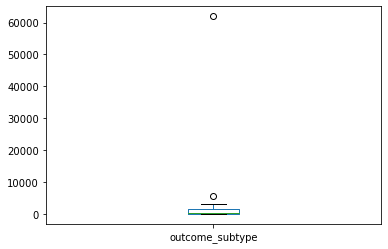

In [42]:
#examine "outcome_subtype" boxplot
df["outcome_subtype"].value_counts().plot(kind='box')
#outliers present but not significant enough to drop --> subtypes vary

<AxesSubplot:>

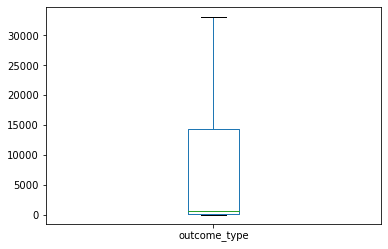

In [43]:
#examine "outcome_type" boxplot
df["outcome_type"].value_counts().plot(kind='box')
#no outliers

<AxesSubplot:>

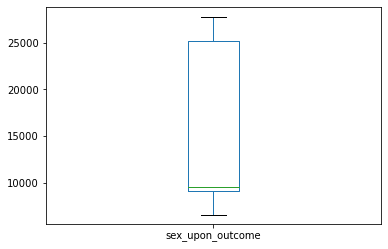

In [44]:
#examine "sex_upon_outcome" boxplot
df["sex_upon_outcome"].value_counts().plot(kind='box')
#no outliers

<AxesSubplot:>

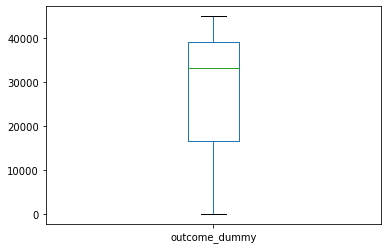

In [45]:
#examine "outcome_dummy" boxplot
df["outcome_dummy"].value_counts().plot(kind='box')
#no outliers

### No centering, scaling, or transforming needed since we are dealing with discrete data!

### Choosing predictor and response variables (encode categorical variables)

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
def label_encode(df, columns):
    for col in columns:
        le = LabelEncoder()
        col_values_unique = list(df[col].unique())
        le_fitted = le.fit(col_values_unique)
 
        col_values = list(df[col].values)
        #le.classes_
        col_values_transformed = le.transform(col_values)
        df[col] = col_values_transformed

In [48]:
#define predictor and response variables
features = df[['age_upon_outcome','outcome_subtype','outcome_type','sex_upon_outcome']] #predictor variables

label_encode(features, features.columns.values)

target = df[['outcome_dummy']] #response variable
label_encode(target, target.columns.values)

<ipython-input-47-b6a57f620db9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = col_values_transformed


My choice of predictor variables derived from the response variable. Since we are looking for "outcome_dummy" (which returns a 1 or 0 to tell us if a pet is adopted or not respectively), I interpreted that every variable that had a direct connection to the outcome would help result in that outcome (i.e., anything with the word "outcome" in its label). The final age, sex, outcome subtype and outcome type help us determine whether or not a pet was adopted. 

For example, if a pet was adopted, "outcome_type" would specify "Adoption". If not, "outcome_type" would specify otherwise. Regardless of whether a pet gets adopted or not, "outcome_subtype" explains *why*. In addition, age and sex help make any final conclusions about a pet when going or not going into adoption.

Although the other variables were helpful in providing information about each pet, I found they were not helpful in determining whether or not a pet was getting adopted. Therefore, I did not include them in my list of predictor variables.

### Create and train three classification models (Naive Bayes, SVM, KNNt)

### Naive Bayes

In [49]:
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.20, random_state = 1)

In [50]:
# To model the Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# instantiate model
nb = GaussianNB()

# fit model
nb.fit(features_train, target_train)

C:\Users\Jen\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [51]:
#make predictions for testing set
target_pred = nb.predict(features_test)
target_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [52]:
#calculate accuracy score
from sklearn import metrics
print(metrics.accuracy_score(target_test, target_pred))
#65.95% accuracy

0.6595323281369793


In [53]:
#calculate AUC score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
clf = LogisticRegression(solver="liblinear").fit(features, target)
roc_auc_score(target_pred, clf.predict_proba(features_test), multi_class='ovr')
#86.13% AUC

C:\Users\Jen\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8613236335536193

In [54]:
#cross validate
from sklearn.model_selection import cross_val_score
validation = cross_val_score(clf, features, target)
validation

C:\Users\Jen\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Jen\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Jen\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Jen\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([0.99380271, 0.99201329, 0.98811578, 0.98722126, 0.98894639])

### SVM

In [55]:
from sklearn import svm

#instantiate model
svm_model = svm.SVC()

#fit model
svm_model.fit(features_train, target_train)

C:\Users\Jen\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [56]:
#make predictions for testing set
target_pred = svm_model.predict(features_test)
target_pred

array([1, 1, 1, ..., 1, 1, 2], dtype=int64)

In [57]:
#calculate accuracy score
print(metrics.accuracy_score(target_test, target_pred))
#99.36% accuracy

0.9936749297214413


In [58]:
#calculate AUC score
clf = LogisticRegression(solver="liblinear").fit(features, target)
roc_auc_score(target_pred, clf.predict_proba(features_test), multi_class='ovr')

C:\Users\Jen\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


ValueError: Number of classes in y_true not equal to the number of columns in 'y_score'

In [59]:
#cross validate
from sklearn.model_selection import cross_val_score
validation = cross_val_score(clf, features, target)
validation

C:\Users\Jen\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Jen\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Jen\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Jen\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([0.99380271, 0.99201329, 0.98811578, 0.98722126, 0.98894639])

### KNN

In [60]:
from sklearn.neighbors import KNeighborsRegressor

# instantiate model
KNN_model = KNeighborsRegressor(n_neighbors=5)

# fit model
KNN_model.fit(features_train, target_train)

KNeighborsRegressor()

In [61]:
#make predictions for testing set
target_pred = KNN_model.predict(features_test)
target_pred

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [2.]])

In [62]:
#calculate accuracy score
print(metrics.accuracy_score(target_test, target_pred.round()))
#99.87% accuracy

0.998786097623307


In [63]:
#calculate AUC score
clf = LogisticRegression(solver="liblinear").fit(features, target)
roc_auc_score(target_pred, clf.predict_proba(features_test), multi_class='ovr')

C:\Users\Jen\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


ValueError: continuous format is not supported

In [64]:
#cross validate
from sklearn.model_selection import cross_val_score
validation = cross_val_score(clf, features, target)
validation

C:\Users\Jen\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Jen\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Jen\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Jen\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([0.99380271, 0.99201329, 0.98811578, 0.98722126, 0.98894639])

### Random Forest

In [65]:
#refer to resources
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
features, target = make_classification()
clf.fit(features, target)

LogisticRegression(solver='liblinear')

### Compare models
* Naive Bayes: 65.95% accuracy
* SVM: 99.36% accuracy
* **KNN: 99.87% accuracy**

The KNN model performed the best since it's ability to predict the test set had the highest accuracy precentage in relation to the original data. I believe the KNN model is a good one because it emphasizes that similar things are near to each other. Therefore, it does a good job at predicting whether or not a pet will get adopted.

### Resources
* Plotting categorical data: https://stackoverflow.com/questions/31029560/plotting-categorical-data-with-pandas-and-matplotlib
* Categorical "outliers": https://medium.com/owl-analytics/categorical-outliers-dont-exist-8f4e82070cb2
* Encoding categorical features: https://inblog.in/Categorical-Naive-Bayes-Classifier-implementation-in-Python-dAVqLWkf7E and class code notes (NaiveBayesLabels)
* Multiclass AUC: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
* Random Forest: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html